# Aims
This notebook is created to analyze the basic information of the study region.

In [1]:
# data
import numpy  as np
import pandas as pd
# plots
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# maps
import xarray as xr
import geopandas as gpd
import salem

## LUCC

In [2]:
lucc2000 = pd.read_csv('../01-data/analysis/land-use-cover-2000.csv') # the data has been preprocess in advance by coauthors
lucc2000 = lucc2000[['Y2000', 'HYZR', 'UYZR', 'NCR', 'MYZR', 'LSR', 'LYZR']]
lucc2000

,Y2000,HYZR,UYZR,NCR,MYZR,LSR,LYZR
0,Glaciers and snow,853.131583,175.359941,282.435150,360.630357,185.026136,963.387866
1,Cultivated land,132.260636,587.205290,936.388940,654.960982,406.253039,202.977947
2,Forest land,34.327188,65.133693,49.603306,563.547716,1220.770270,11292.036812
3,Grass land,44027.647399,37871.735011,11773.192829,15271.038105,17427.652013,14999.161400
4,Water body,473.513269,593.217630,192.339350,452.043622,207.148827,295.883275
5,Urban land,1.009623,5.010284,26.320122,37.168031,46.256534,2.019681
6,Unused land,4217.196000,4618.479829,1099.371231,2665.048289,6107.873656,10663.916002


In [3]:
# calculate the percentage of the category "glaciers and snow"
percent = lucc2000.iloc[0,1:]/lucc2000.sum(axis=0)[1:] * 100

percent

HYZR    1.715214
UYZR    0.399306
NCR     1.966866
MYZR    1.802752
LSR     0.722731
LYZR    2.507557
dtype: object

## Elevation

In [4]:
# calculate the mean elevation
var = xr.open_dataset('../01-data/geo_files/QTP.tif')

name = ['HYZR', 'UYZR', 'NCR', 'MYZR', 'LSR', 'LYZR']
for i in np.arange(0,len(name)):
    shdf = salem.read_shapefile('../01-data/geo_files/watershed/'+str(name[i])+'.shp')
    var_sub = var.salem.subset(shape=shdf)
    var_roi = var_sub.salem.roi(shape=shdf)

    dem = np.array(var_roi['band_data'][0])

    print(name[i], np.round(np.nanmean(dem), decimals=1), 'm')

HYZR 5061.6 m
UYZR 4985.9 m
NCR 4733.5 m
MYZR 4681.2 m
LSR 4879.6 m
LYZR 4587.0 m


## Watersheds
The figure will be combined with Figure 1 in [Li et al. 2021](https://www.sciencedirect.com/science/article/pii/S0022169421010313) in Adobe Photoshop.

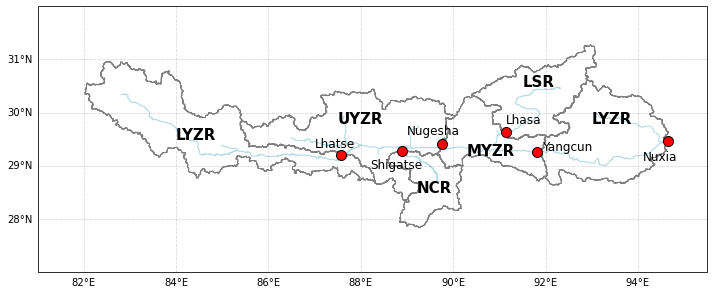

In [5]:
# create the figure 
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# set the extents
ax.set_extent([81, 95.5, 27, 32])
# add grinlines and labels
gl = ax.gridlines(linestyle='--',color='grey', alpha=0.3, draw_labels=True)
gl.top_labels = False; gl.right_labels = False
# plot the boundaries
geoshp = gpd.read_file('../01-data/geo_files/watershed/YZR.shp')
geoshp.boundary.plot(ax=ax, color='grey', lw=1.0, zorder=0)
# plot the river
river = gpd.read_file('../01-data/geo_files/river_line/river_in_basin.shp')
river = river.to_crs("EPSG:4610")
river.plot(ax=ax,color='lightblue', lw=1.0, zorder=1)
# plot the stations
def plot_stations():
    plt.scatter(87.57,29.20, s=100, color='r', edgecolor='k')
    plt.text(87.00, 29.35, 'Lhatse', fontsize=12)
    plt.text(84.00, 29.50, 'LYZR', fontsize=15, weight="bold")

    plt.scatter(89.75,29.40, s=100, color='r', edgecolor='k')
    plt.text(89.00, 29.60, 'Nugesha', fontsize=12)
    plt.text(87.50, 29.80, 'UYZR', fontsize=15, weight="bold")

    plt.scatter(88.89,29.28, s=100, color='r', edgecolor='k')
    plt.text(88.20,28.95, 'Shigatse', fontsize=12)
    plt.text(89.20, 28.50, 'NCR', fontsize=15, weight="bold")

    plt.scatter(91.15,29.64, s=100, color='r', edgecolor='k')
    plt.text(91.15,29.804, 'Lhasa', fontsize=12,)
    plt.text(90.30, 29.20, 'MYZR', fontsize=15, weight="bold")

    plt.scatter(91.82,29.26, s=100, color='r', edgecolor='k')
    plt.text(91.95,29.30, 'Yangcun', fontsize=12,)
    plt.text(91.50, 30.50, 'LSR', fontsize=15, weight="bold")

    plt.scatter(94.65,29.46, s=100, color='r', edgecolor='k')
    plt.text(94.10,29.10, 'Nuxia', fontsize=12,)
    plt.text(93.00, 29.80, 'LYZR', fontsize=15, weight="bold")
plot_stations()
# save the figure
plt.savefig('../03-res/02-figures/Figure1b.png', dpi=300, bbox_inches='tight')